## CAPSTONE PROJECT - CLUSTERING 
## AZIZ HENDRA ATMAJA - CUSTOMER SEGMENTATION 1

#### IMPORT PACKAGES

In [1]:
# import package
import os
import pandas as pd
import numpy as np
import statistics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#### READ DATASET

In [2]:
url_data = ('https://raw.githubusercontent.com/hendraaziz/dataset/main/JDS-Narasio/capstone/marketing.csv')
df = pd.read_csv(url_data,sep=";")

In [3]:
df.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,42
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,5
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,15


#### PROBLEM STATEMENT

Bergerak di bidang retail, Perusahaan ABC selalu mencatat data tentang
pelanggan mereka. Data yang dimiliki dapat digunakan dalam mengelompokan
pelanggan untuk mengetahui karakteristik pelanggan. Perusahaan ABC akan
melakukan campaign terhadap produk yang mereka sediakan, sehingga
perusahaan ingin menganalisis segmen pelanggan mana yang paling mungkin
membeli produk dan kemudian memasarkan produk hanya pada segmen
tertentu. Produk yang disediakan oleh perusahaan ABC adalah wine, buah, daging, ikan, dan emas. Hal yang ingin diketahui perusahaan ABC yaitu:

*   Customer yang dikelompokkan berdasar produk yang disediakan.
*   Customer profiling.



1. **CUSTOMER GROUPING**
- Menentukan nilai optimum K.
- Mengelompokan customer menggunakan K-Means sejumlah nilai K.

2. **CUSTOMER PROFILE**
- a Bagaimana persebaran usia customer pada masing2 kelompok?
- b Bagaimana persebaran Customer berdasarkan pendidikan pada masing2 kelompok?
- c Bagaimana persebaran penghasilan customer pada masing2 kelompok?
- d Bagaimana persebaran Customer berdasarkan Status Pernikahan pada masing2 kelompok?
- e Bagaimana persebaran penjualan produk berdasarkan masing2 kelompok?
- f Apakah ada hubungan antara penjualan produk terhadap customer dengan pendapatan customer? 

####Exploratory Data Analis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   tahun_lahir          2240 non-null   int64  
 2   Pendidikan           2240 non-null   object 
 3   Status_pernikahan    2240 non-null   object 
 4   Pendapatan           2216 non-null   float64
 5   jumlah_anak          2240 non-null   int64  
 6   jumlah_remaja        2240 non-null   int64  
 7   tanggal_pendaftaran  2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   Spent_wine           2240 non-null   int64  
 10  Spent_buah           2240 non-null   int64  
 11  Spent_daging         2240 non-null   int64  
 12  Spent_ikan           2240 non-null   int64  
 13  Spent_emas           2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


In [5]:
# Data kategori
categorical = ["Pendidikan", "Status_pernikahan"]
df_categorical = df[categorical]
df_categorical.head()

,Pendidikan,Status_pernikahan
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married


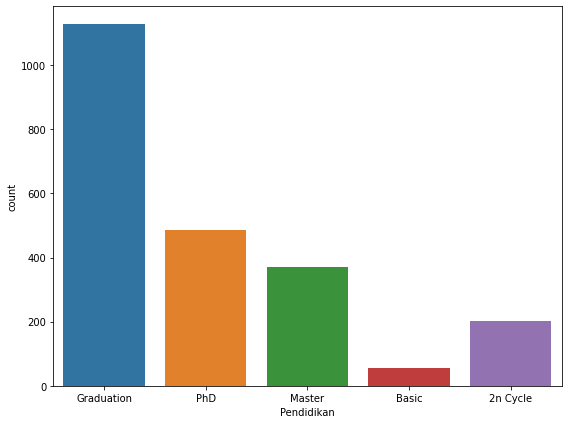

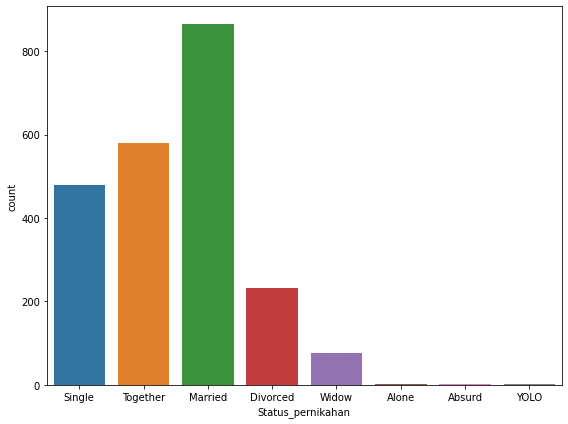

In [6]:
# Melihat perbandingan data kategori disetiap kolom
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

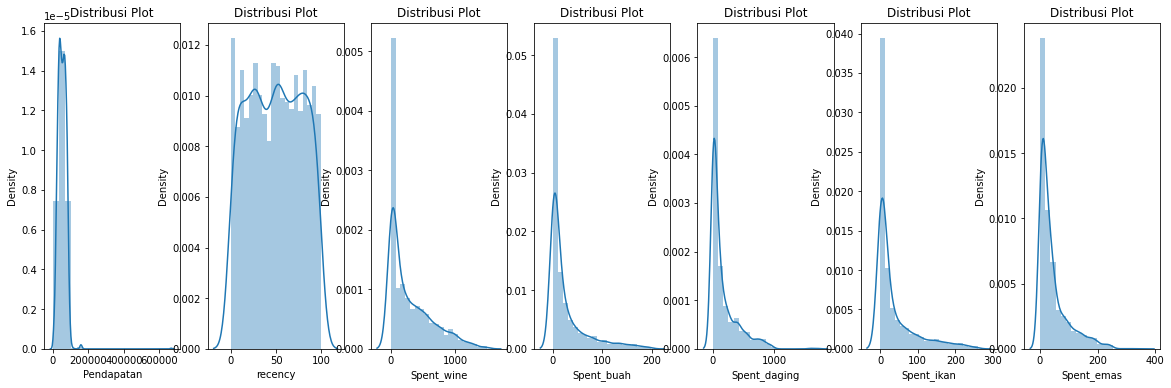

In [7]:
#visualisasi sebaran data
plt.figure(1, figsize=(20,6))
n = 0
for x in ['Pendapatan','recency','Spent_wine','Spent_buah','Spent_daging', 'Spent_ikan', 'Spent_emas']:
  n+=1
  plt.subplot(1,7,n)
  plt.subplots_adjust(hspace=0.2,wspace=0.2)
  sns.distplot(df[x], bins=20)
  plt.title('Distribusi Plot')
plt.show()

#### DATA PRE-PROCESSING (Missing Value, Cek Tipe Data,Handling Outlier dll)

In [8]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   tahun_lahir          2240 non-null   int64  
 2   Pendidikan           2240 non-null   object 
 3   Status_pernikahan    2240 non-null   object 
 4   Pendapatan           2216 non-null   float64
 5   jumlah_anak          2240 non-null   int64  
 6   jumlah_remaja        2240 non-null   int64  
 7   tanggal_pendaftaran  2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   Spent_wine           2240 non-null   int64  
 10  Spent_buah           2240 non-null   int64  
 11  Spent_daging         2240 non-null   int64  
 12  Spent_ikan           2240 non-null   int64  
 13  Spent_emas           2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


#####mengubah tipe data

In [9]:
#mengubah ID menjadi string
df['ID'] = df.ID.astype(str)

In [10]:
#mengubah tanggal_pendaftaran menjadi datetime
df['tanggal_pendaftaran'] = pd.to_datetime(df['tanggal_pendaftaran'],format='%d/%m/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   tahun_lahir          2240 non-null   int64         
 2   Pendidikan           2240 non-null   object        
 3   Status_pernikahan    2240 non-null   object        
 4   Pendapatan           2216 non-null   float64       
 5   jumlah_anak          2240 non-null   int64         
 6   jumlah_remaja        2240 non-null   int64         
 7   tanggal_pendaftaran  2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   Spent_wine           2240 non-null   int64         
 10  Spent_buah           2240 non-null   int64         
 11  Spent_daging         2240 non-null   int64         
 12  Spent_ikan           2240 non-null   int64         
 13  Spent_emas           2240 non-nul

#####cek missing value

In [12]:
df.isnull().sum()

ID                      0
tahun_lahir             0
Pendidikan              0
Status_pernikahan       0
Pendapatan             24
jumlah_anak             0
jumlah_remaja           0
tanggal_pendaftaran     0
recency                 0
Spent_wine              0
Spent_buah              0
Spent_daging            0
Spent_ikan              0
Spent_emas              0
dtype: int64

In [13]:
#cek prosentase data kosong
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

ID                     0.00
tahun_lahir            0.00
Pendidikan             0.00
Status_pernikahan      0.00
Pendapatan             1.07
jumlah_anak            0.00
jumlah_remaja          0.00
tanggal_pendaftaran    0.00
recency                0.00
Spent_wine             0.00
Spent_buah             0.00
Spent_daging           0.00
Spent_ikan             0.00
Spent_emas             0.00
dtype: float64

In [14]:
#cek jumlah data
df.shape

(2240, 14)

In [15]:
#karena jumlah data yang kosong hanya 1%, diambil keputusan untuk menghapus data dengan nilai "pendapatan" kosong
df = df.dropna()
df.shape

(2216, 14)

In [16]:
#pengecekan kembali apakah ada data bernilai kosong.
df.isnull().sum()

ID                     0
tahun_lahir            0
Pendidikan             0
Status_pernikahan      0
Pendapatan             0
jumlah_anak            0
jumlah_remaja          0
tanggal_pendaftaran    0
recency                0
Spent_wine             0
Spent_buah             0
Spent_daging           0
Spent_ikan             0
Spent_emas             0
dtype: int64

#####cek duplikasi data

In [17]:
#cek duplicate data
df[df.duplicated(keep='first')]

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas


#####Data Encoding

In [18]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)


#####Fiture Enginering

In [19]:
#cek tahun terakhir data pendaftaran yg ada
df.tanggal_pendaftaran.max()

Timestamp('2014-06-29 00:00:00')

In [20]:
#menambahkan kolom Umur dari kolom tahun_lahir di kurangi dengan tahun terakhir pendaftaran yang ada
df['Umur'] = 2014 - df['tahun_lahir'] #2014 adalah data tahun terkahir tanggal pendaftaran

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#menambahkan kolom total_anak dari penjumlahan kolom jumlah_anak dan jumlah_remaja
df['total_anak'] = df['jumlah_anak']+df['jumlah_remaja']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#menambahkan kolom total_spent dari penjumlahan kolom 'Spent_wine','Spent_buah','Spent_daging', 'Spent_ikan', 'Spent_emas'
df['total_spent'] = df['Spent_wine']+ df['Spent_buah']+df['Spent_daging']+df['Spent_ikan']+df['Spent_emas']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#####Merge Data

In [23]:
# Menggabungkan data kategorikal yang sudah di encode, data hasil feature enginering dengan data lainnya. 

merge_data = pd.concat([encoded_data ,df[["Pendapatan","Umur","recency","total_anak","Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas","total_spent"]]], axis=1)

merge_data.head()

,Pendidikan,Status_pernikahan,Pendapatan,Umur,recency,total_anak,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent
0,2,4,58138.0,57,58,0,635,88,546,172,88,1529
1,2,4,46344.0,60,38,2,11,1,6,2,6,26
2,2,5,71613.0,49,26,0,426,49,127,111,42,755
3,2,5,26646.0,30,26,1,11,4,20,10,5,50
4,4,3,58293.0,33,94,1,173,43,118,46,15,395


In [24]:
merge_data.describe()

,Pendidikan,Status_pernikahan,Pendapatan,Umur,recency,total_anak,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.393953,3.726083,52247.251354,45.179603,49.012635,0.947202,305.091606,26.356047,166.995939,37.637635,43.965253,580.046480
std,1.124141,1.077731,25173.076661,11.985554,28.948352,0.749062,337.327920,39.793917,224.283273,54.752082,51.815414,578.888028
min,0.000000,0.000000,1730.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2.000000,3.000000,35303.000000,37.000000,24.000000,0.000000,24.000000,2.000000,16.000000,3.000000,9.000000,65.000000
50%,2.000000,4.000000,51381.500000,44.000000,49.000000,1.000000,174.500000,8.000000,68.000000,12.000000,24.500000,380.000000
75%,3.000000,5.000000,68522.000000,55.000000,74.000000,1.000000,505.000000,33.000000,232.250000,50.000000,56.000000,998.250000
max,4.000000,7.000000,666666.000000,121.000000,99.000000,3.000000,1493.000000,199.000000,1725.000000,259.000000,321.000000,2440.000000


#####Handling Outlier

Text(0.5, 0, 'Attribute - Umur')

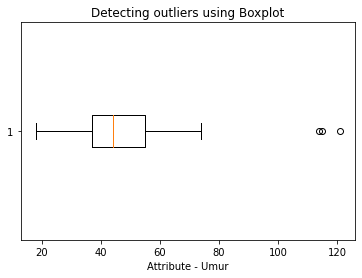

In [25]:
#Boxplot of Umur
plt.boxplot(merge_data['Umur'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Umur")

Text(0.5, 0, 'Attribute - Pendapatan')

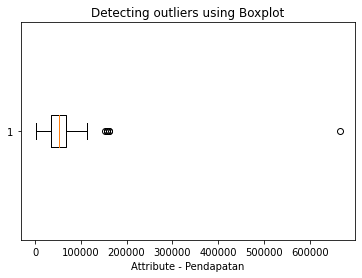

In [26]:
#Boxplot of Pendapatan
plt.boxplot(merge_data['Pendapatan'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Pendapatan")

Text(0.5, 0, 'Attribute - Spent_wine')

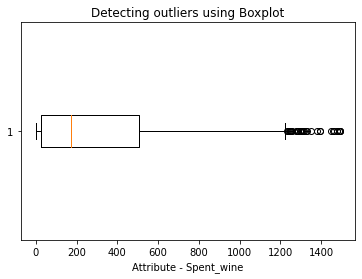

In [27]:
#Boxplot of Spent_wine
plt.boxplot(merge_data['Spent_wine'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Spent_wine")

Text(0.5, 0, 'Attribute - Spent_buah')

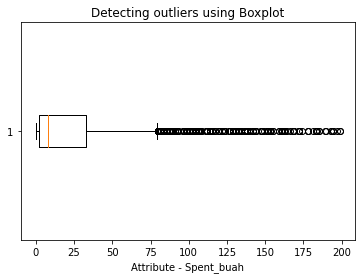

In [28]:
#Boxplot of Spent_buah

plt.boxplot(merge_data['Spent_buah'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Spent_buah")

Text(0.5, 0, 'Attribute - Spent_daging')

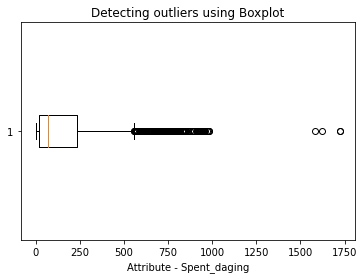

In [29]:
#Boxplot of Spent_daging

plt.boxplot(merge_data['Spent_daging'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Spent_daging")

Text(0.5, 0, 'Attribute - Spent_ikan')

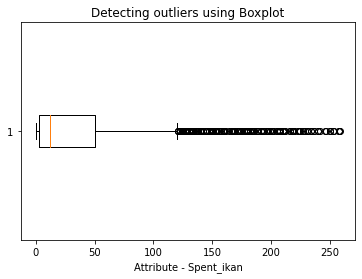

In [30]:
#Boxplot of Spent_ikan

plt.boxplot(merge_data['Spent_ikan'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Spent_ikan")

Text(0.5, 0, 'Attribute - Spent_emas')

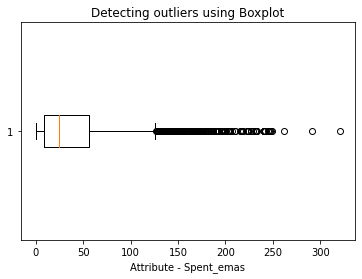

In [31]:
#Boxplot of Spent_emas

plt.boxplot(merge_data['Spent_emas'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - Spent_emas")

Text(0.5, 0, 'Attribute - total_spent')

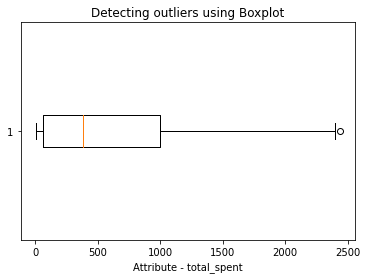

In [32]:
#Boxplot of total_spent

plt.boxplot(merge_data['total_spent'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel("Attribute - total_spent")

Dari boxplot sebelumnya terlihat pada data Umur, Pendapatan, spent_daging dan spent emas ada pencilan yang cukup terlihat. kita akan mencoba melakukan deteksi pencilan tersebut.

In [33]:
# Fungsi deteksi Outlier dengan Z-score
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [34]:
# Umur
# Deteksi outlier dengan Z-score
umur_outliers_z = detect_outliers_zscore(list(merge_data.Umur))
print("Outliers from Z-score method: ", umur_outliers_z)
print("Jumlah data Outlier from Z-Score: ",len(umur_outliers_z))
# Deteksi outlier dengan IQR
umur_outliers_iqr = detect_outliers_iqr(list(merge_data.Umur))
print("Outliers from IQR method: ", umur_outliers_iqr)
print("Jumlah data Outlier from IQR: ",len(umur_outliers_iqr))

Outliers from Z-score method:  [114, 121, 115]
Jumlah data Outlier from Z-Score:  3
Outliers from IQR method:  [114, 115, 121]
Jumlah data Outlier from IQR:  3


In [35]:
# Pendapatan
# Deteksi outlier dengan Z-score
pendapatan_outliers_z = detect_outliers_zscore(list(merge_data.Pendapatan))
print("Outliers from Z-score method: ", pendapatan_outliers_z)
print("Jumlah data Outlier from Z-Score: ",len(pendapatan_outliers_z))
# Deteksi outlier dengan IQR
pendapatan_outliers_iqr = detect_outliers_iqr(list(merge_data.Pendapatan))
print("Outliers from IQR method: ", pendapatan_outliers_iqr)
print("Jumlah data Outlier from IQR: ",len(pendapatan_outliers_iqr))

Outliers from Z-score method:  [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
Jumlah data Outlier from Z-Score:  8
Outliers from IQR method:  [153924.0, 156924.0, 157146.0, 157243.0, 157733.0, 160803.0, 162397.0, 666666.0]
Jumlah data Outlier from IQR:  8


In [36]:
# Spent Daging
# Deteksi outlier dengan Z-score
daging_outliers_z = detect_outliers_zscore(list(merge_data.Spent_daging))
print("Outliers from Z-score method: ", daging_outliers_z)
print("Jumlah data Outlier from Z-Score: ",len(daging_outliers_z))
# Deteksi outlier dengan IQR
daging_outliers_iqr = detect_outliers_iqr(list(merge_data.Spent_daging))
print("Outliers from IQR method: ", daging_outliers_iqr)
print("Jumlah data Outlier from IQR: ",len(daging_outliers_iqr))

Outliers from Z-score method:  [1725, 925, 951, 921, 1582, 974, 925, 940, 1622, 898, 929, 845, 873, 890, 925, 961, 842, 843, 864, 915, 913, 946, 842, 984, 915, 1725, 850, 936, 935, 853, 981, 899, 951, 932, 968, 883, 849, 845, 860]
Jumlah data Outlier from Z-Score:  39
Outliers from IQR method:  [558, 559, 560, 561, 562, 565, 565, 567, 568, 568, 569, 570, 572, 573, 573, 573, 573, 575, 586, 590, 590, 591, 592, 592, 594, 595, 597, 597, 599, 601, 602, 603, 604, 606, 607, 611, 612, 613, 614, 617, 622, 625, 629, 631, 635, 639, 640, 649, 650, 651, 653, 653, 654, 655, 670, 672, 672, 673, 674, 678, 685, 687, 687, 689, 689, 689, 690, 693, 694, 697, 701, 704, 706, 706, 706, 708, 711, 711, 713, 716, 717, 717, 724, 731, 731, 732, 733, 735, 736, 740, 742, 746, 747, 749, 750, 751, 753, 754, 756, 757, 758, 761, 768, 768, 768, 774, 779, 780, 780, 785, 786, 790, 790, 792, 797, 797, 801, 801, 804, 812, 813, 815, 815, 815, 816, 818, 818, 818, 827, 832, 832, 835, 835, 838, 838, 842, 842, 843, 845, 845, 849

In [37]:
# Spent Emas
# Deteksi outlier dengan Z-score
emas_outliers_z = detect_outliers_zscore(list(merge_data.Spent_emas))
print("Outliers from Z-score method: ", emas_outliers_z)
print("Jumlah data Outlier from Z-Score: ",len(emas_outliers_z))
# Deteksi outlier dengan IQR
emas_outliers_iqr = detect_outliers_iqr(list(merge_data.Spent_emas))
print("Outliers from IQR method: ", emas_outliers_iqr)
print("Jumlah data Outlier from IQR: ",len(emas_outliers_iqr))

Outliers from Z-score method:  [241, 223, 216, 223, 241, 203, 224, 218, 233, 241, 224, 207, 242, 249, 227, 205, 205, 242, 241, 227, 231, 218, 200, 200, 210, 241, 210, 205, 262, 246, 200, 215, 291, 232, 219, 203, 224, 321, 204, 232, 245, 229, 241, 248, 227, 247]
Jumlah data Outlier from Z-Score:  46
Outliers from IQR method:  [127, 128, 128, 129, 129, 129, 130, 130, 130, 130, 130, 131, 131, 131, 131, 132, 133, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134, 135, 135, 137, 138, 138, 139, 139, 139, 140, 141, 141, 141, 141, 142, 142, 142, 143, 143, 144, 144, 144, 144, 145, 145, 145, 145, 145, 146, 146, 147, 147, 147, 148, 149, 149, 149, 150, 150, 151, 151, 151, 152, 152, 152, 153, 153, 153, 153, 153, 153, 154, 154, 154, 154, 155, 157, 158, 159, 159, 160, 161, 162, 162, 163, 163, 163, 165, 166, 166, 168, 168, 168, 169, 170, 170, 170, 171, 172, 172, 172, 172, 172, 172, 172, 173, 174, 174, 174, 174, 174, 175, 175, 176, 176, 176, 177, 178, 180, 181, 182, 182, 182, 182, 182, 183, 183, 183, 18

Handling Outlier dengan metode "Replace Median Data"

In [38]:
#Replace median Umur

umur_med = []
for y in list(merge_data.Umur):
    ff = y in umur_outliers_iqr
    if ff is True:
        y=statistics.median(list(merge_data.Umur))
    else:
        y=y
    umur_med.append(y)
# Menghitung nilai mean dan median data

print("Mean data : ",statistics.mean(list(merge_data.Umur)))
print("Median data : ",statistics.median(list(merge_data.Umur)))
print("Mean data setelah Replace Median : ",statistics.mean(umur_med))
print("Median data setelah Replace Median: ",statistics.median(umur_med))

Mean data :  45.17960288808664
Median data :  44.0
Mean data setelah Replace Median :  45.081227436823106
Median data setelah Replace Median:  44.0


In [39]:
#Replace median Pendapatan

pendapatan_med = []
for y in list(merge_data.Pendapatan):
    ff = y in pendapatan_outliers_iqr
    if ff is True:
        y=statistics.median(list(merge_data.Pendapatan))
    else:
        y=y
    pendapatan_med.append(y)
# Menghitung nilai mean dan median data

print("Mean data : ",statistics.mean(list(merge_data.Pendapatan)))
print("Median data : ",statistics.median(list(merge_data.Pendapatan)))
print("Mean data setelah Replace Median : ",statistics.mean(pendapatan_med))
print("Median data setelah Replace Median: ",statistics.median(pendapatan_med))

Mean data :  52247.25135379061
Median data :  51381.5
Mean data setelah Replace Median :  51632.72788808664
Median data setelah Replace Median:  51377.25


Text(0.5, 0, 'Attribute - Pendapatan')

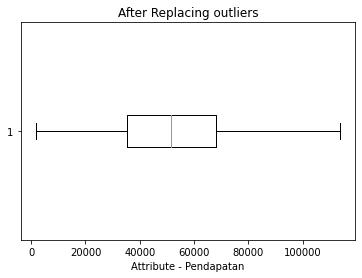

In [40]:
plt.boxplot(pendapatan_med, vert=False)
plt.title("After Replacing outliers")
plt.xlabel("Attribute - Pendapatan")

In [41]:
#Replace median Spent_daging

daging_med = []
for y in list(merge_data.Spent_daging):
    ff = y in daging_outliers_iqr
    if ff is True:
        y=statistics.median(list(merge_data.Spent_daging))
    else:
        y=y
    daging_med.append(y)
# Menghitung nilai mean dan median data

print("Mean data : ",statistics.mean(list(merge_data.Spent_daging)))
print("Median data : ",statistics.median(list(merge_data.Spent_daging)))
print("Mean data setelah Replace Median : ",statistics.mean(daging_med))
print("Median data setelah Replace Median: ",statistics.median(daging_med))

Mean data :  166.99593862815885
Median data :  68.0
Mean data setelah Replace Median :  112.90162454873646
Median data setelah Replace Median:  68.0


Text(0.5, 0, 'Attribute - Spent_daging')

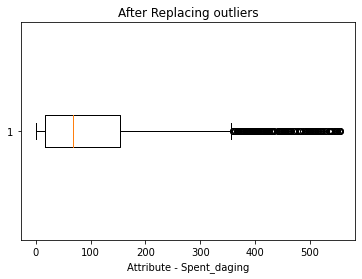

In [42]:
plt.boxplot(daging_med, vert=False)
plt.title("After Replacing outliers")
plt.xlabel("Attribute - Spent_daging")

In [43]:
#Replace median Spent_emas

emas_med = []
for y in list(merge_data.Spent_emas):
    ff = y in emas_outliers_iqr
    if ff is True:
        y=statistics.median(list(merge_data.Spent_emas))
    else:
        y=y
    emas_med.append(y)
# Menghitung nilai mean dan median data

print("Mean data : ",statistics.mean(list(merge_data.Spent_emas)))
print("Median data : ",statistics.median(list(merge_data.Spent_emas)))
print("Mean data setelah Replace Median : ",statistics.mean(emas_med))
print("Median data setelah Replace Median: ",statistics.median(emas_med))

Mean data :  43.96525270758123
Median data :  24.5
Mean data setelah Replace Median :  30.061597472924188
Median data setelah Replace Median:  24.25


Text(0.5, 0, 'Attribute - Spent_emas')

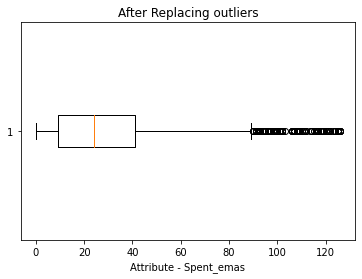

In [44]:
plt.boxplot(emas_med, vert=False)
plt.title("After Replacing outliers")
plt.xlabel("Attribute - Spent_emas")

In [45]:
#Mengubah nilai pada dataframe merge_data pendapatan, Spent_daging dan Spent_emas dengan nilai hasil handing outlier
merge_data['Umur']= umur_med
merge_data['Pendapatan']= pendapatan_med
merge_data['Spent_daging']= daging_med 
merge_data['Spent_emas']= emas_med

In [46]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pendidikan         2216 non-null   int64  
 1   Status_pernikahan  2216 non-null   int64  
 2   Pendapatan         2216 non-null   float64
 3   Umur               2216 non-null   float64
 4   recency            2216 non-null   int64  
 5   total_anak         2216 non-null   int64  
 6   Spent_wine         2216 non-null   int64  
 7   Spent_buah         2216 non-null   int64  
 8   Spent_daging       2216 non-null   float64
 9   Spent_ikan         2216 non-null   int64  
 10  Spent_emas         2216 non-null   float64
 11  total_spent        2216 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 225.1 KB


In [47]:
merge_data = merge_data.astype({"Umur":"int","Spent_daging":"int","Spent_emas":"int"})
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pendidikan         2216 non-null   int64  
 1   Status_pernikahan  2216 non-null   int64  
 2   Pendapatan         2216 non-null   float64
 3   Umur               2216 non-null   int64  
 4   recency            2216 non-null   int64  
 5   total_anak         2216 non-null   int64  
 6   Spent_wine         2216 non-null   int64  
 7   Spent_buah         2216 non-null   int64  
 8   Spent_daging       2216 non-null   int64  
 9   Spent_ikan         2216 non-null   int64  
 10  Spent_emas         2216 non-null   int64  
 11  total_spent        2216 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 225.1 KB


#####Features Selection
Dalam clustering perlu diketahui juga hubungan tiap variabelnya. Hal ini akan membantu anda dalam menentukan features mana saja yang akan digunakan. Pemilihan ini dapat dicoba dengan mengalisa korelasi tiap variabel.

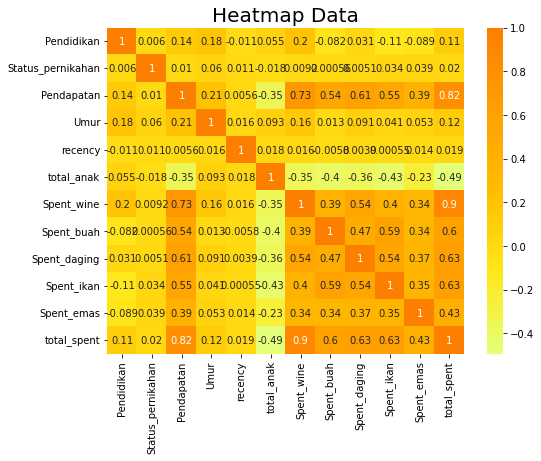

In [48]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(merge_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

Dari hasil heatmap diatas diketahui bahwa korelasi terbesar dimiliki oleh variabel ( Pendapatan, spent_wine, spent_dbuah, spent_daging, spent_ikan,spent_emas), selanjutnya disusul oleh total_anak, recency, dan status pernikahan, akan tetapi nilainya cukup rendah. Oleh karena itu, untuk selanjutnya akan digunakan 6 variabel dalam menentukan cluster dari data yaitu  pendapatan, spent_wine, spent_dbuah, spent_daging, spent_ikan,spent_emas.

In [49]:
df_spent = merge_data[['Pendapatan','Spent_wine','Spent_buah','Spent_daging', 'Spent_ikan', 'Spent_emas', 'total_spent']]
df_spent.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent
0,58138.0,635,88,546,172,88,1529
1,46344.0,11,1,6,2,6,26
2,71613.0,426,49,127,111,42,755
3,26646.0,11,4,20,10,5,50
4,58293.0,173,43,118,46,15,395


In [50]:
df_spent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    2216 non-null   float64
 1   Spent_wine    2216 non-null   int64  
 2   Spent_buah    2216 non-null   int64  
 3   Spent_daging  2216 non-null   int64  
 4   Spent_ikan    2216 non-null   int64  
 5   Spent_emas    2216 non-null   int64  
 6   total_spent   2216 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 138.5 KB


#### MODELING & EVALUATION

#####Menentukan Nilai Optimal K

In [51]:
# Data Scaling
scaler = StandardScaler()
df_spent_scal = df_spent.copy()
df_spent_scal[['Pendapatan','Spent_wine','Spent_buah','Spent_daging', 'Spent_ikan', 'Spent_emas','total_spent']] = scaler.fit_transform(df_spent_scal[['Pendapatan','Spent_wine','Spent_buah','Spent_daging', 'Spent_ikan', 'Spent_emas','total_spent']])
df_spent_scal.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent
0,0.314701,0.978226,1.549429,3.210081,2.454568,2.023255,1.639640
1,-0.255849,-0.872024,-0.637328,-0.792344,-0.651038,-0.837966,-0.957303
2,0.966572,0.358511,0.569159,0.104496,1.340203,0.418180,0.302292
3,-1.208766,-0.872024,-0.561922,-0.688577,-0.504892,-0.872859,-0.915835
4,0.322199,-0.391671,0.418348,0.037789,0.152766,-0.523929,-0.319731


######Elbow Method

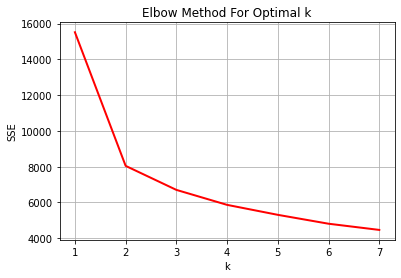

In [52]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE

Sum_of_squared_error = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_spent_scal)
    Sum_of_squared_error.append(km.inertia_)

plt.plot(K, Sum_of_squared_error, linewidth=2,color="red")
plt.grid()
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3,  Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

######Silhouette score untuk konfirmasi k-kluster

In [53]:
range_n_clusters = range(2,8)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_spent_scal)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_spent_scal, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4708287436542585
For n_clusters = 3, silhouette score is 0.39971574824885336
For n_clusters = 4, silhouette score is 0.356194947630384
For n_clusters = 5, silhouette score is 0.3242792167420855
For n_clusters = 6, silhouette score is 0.3362929812539103
For n_clusters = 7, silhouette score is 0.3182212611249683


Dari silhouette model didapat k-kluster yang optimum adalah 3, namun sangat tidak optimal apabila membagi cluster hanya menjadi 2 kelompok(meningkatkan faktor error), maka diambil nilai terbesar kedua yaitu adalah nilai 3, hal ini sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=3 yang artinya customer akan dibagi kedalam 3 kelompok.

In [54]:
#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(df_spent_scal)
pred = kmeans.predict(df_spent_scal)
df_spent['segment']=kmeans.labels_
df_spent.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent,segment
0,58138.0,635,88,546,172,88,1529,2
1,46344.0,11,1,6,2,6,26,0
2,71613.0,426,49,127,111,42,755,1
3,26646.0,11,4,20,10,5,50,0
4,58293.0,173,43,118,46,15,395,0
5,62513.0,520,42,98,0,14,674,1
6,55635.0,235,65,164,50,27,541,1
7,33454.0,76,10,56,3,23,168,0
8,30351.0,14,0,24,3,2,43,0
9,5648.0,28,0,6,1,13,48,0


In [63]:
# Menggabungkan data df_spent dengan data sebelumnya
df_result = pd.concat([df[['ID','Pendidikan','Status_pernikahan','total_anak','recency']], merge_data['Umur'],df_spent], axis=1, join='inner')
df_result.head()

,ID,Pendidikan,Status_pernikahan,total_anak,recency,Umur,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent,segment
0,5524,Graduation,Single,0,58,57,58138.0,635,88,546,172,88,1529,2
1,2174,Graduation,Single,2,38,60,46344.0,11,1,6,2,6,26,0
2,4141,Graduation,Together,0,26,49,71613.0,426,49,127,111,42,755,1
3,6182,Graduation,Together,1,26,30,26646.0,11,4,20,10,5,50,0
4,5324,PhD,Married,1,94,33,58293.0,173,43,118,46,15,395,0


In [64]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2216 non-null   object 
 1   Pendidikan         2216 non-null   object 
 2   Status_pernikahan  2216 non-null   object 
 3   total_anak         2216 non-null   int64  
 4   recency            2216 non-null   int64  
 5   Umur               2216 non-null   int64  
 6   Pendapatan         2216 non-null   float64
 7   Spent_wine         2216 non-null   int64  
 8   Spent_buah         2216 non-null   int64  
 9   Spent_daging       2216 non-null   int64  
 10  Spent_ikan         2216 non-null   int64  
 11  Spent_emas         2216 non-null   int64  
 12  total_spent        2216 non-null   int64  
 13  segment            2216 non-null   int32  
dtypes: float64(1), int32(1), int64(9), object(3)
memory usage: 315.6+ KB


In [88]:
# Menampilkan 5 data teratas dari cluster 0
df_result[df_result["segment"]==0][:5]

,ID,Pendidikan,Status_pernikahan,total_anak,recency,Umur,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent,segment
1,2174,Graduation,Single,2,38,60,46344.0,11,1,6,2,6,26,0
3,6182,Graduation,Together,1,26,30,26646.0,11,4,20,10,5,50,0
4,5324,PhD,Married,1,94,33,58293.0,173,43,118,46,15,395,0
7,6177,PhD,Married,1,32,29,33454.0,76,10,56,3,23,168,0
8,4855,PhD,Together,1,19,40,30351.0,14,0,24,3,2,43,0


In [89]:
# Menampilkan 5 data teratas dari cluster 1
df_result[df_result["segment"]==1][:5]

,ID,Pendidikan,Status_pernikahan,total_anak,recency,Umur,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent,segment
2,4141,Graduation,Together,0,26,49,71613.0,426,49,127,111,42,755,1
5,7446,Master,Together,1,16,47,62513.0,520,42,98,0,14,674,1
6,965,Graduation,Divorced,1,34,43,55635.0,235,65,164,50,27,541,1
15,2114,PhD,Single,0,23,68,82800.0,1006,22,115,59,45,1247,1
22,1993,PhD,Married,1,63,65,58607.0,867,0,86,0,19,972,1


In [90]:
# Menampilkan 5 data teratas dari cluster 2
df_result[df_result["segment"]==2][:5]

,ID,Pendidikan,Status_pernikahan,total_anak,recency,Umur,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent,segment
0,5524,Graduation,Single,0,58,57,58138.0,635,88,546,172,88,1529,2
12,2125,Graduation,Divorced,0,82,55,63033.0,194,61,480,225,30,990,2
18,6565,Master,Married,1,91,65,76995.0,1012,80,498,0,24,1766,2
34,8755,Master,Married,0,4,68,68657.0,482,34,471,119,22,1128,2
40,8601,Graduation,Married,1,3,34,80011.0,421,76,536,82,102,1217,2


### EDA 2

Selanjutnya setelah menentukan segmentasi pelanggan akan dilakukan analisa pada masing-masing cluster. Bagaimana kondisi dari cluster 0, cluster 1 dan juga cluster 2.

####Persebaran usia customer pada masing2 kelompok

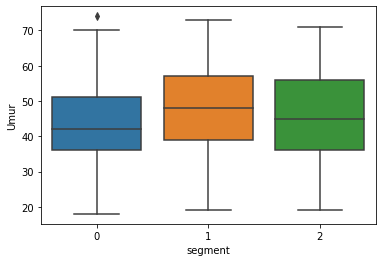

In [72]:
# Pengelompokan customer berdasarkan usia
sns.boxplot(x=df_result["segment"], y=df_result["Umur"], data=df_result)

Dari usia diketahui bahwa tidak terdapat perbedaan yang mencolok berada diantara ke 3 cluster. Namun dapat dilihat bahwa rerata usia pada cluster 0 adalah yang terendah, diikuti cluster 2 lalu rerata usia cluster 1 yang tertinggi.

#####Persebaran Customer berdasarkan pendidikan pada masing2 kelompok.

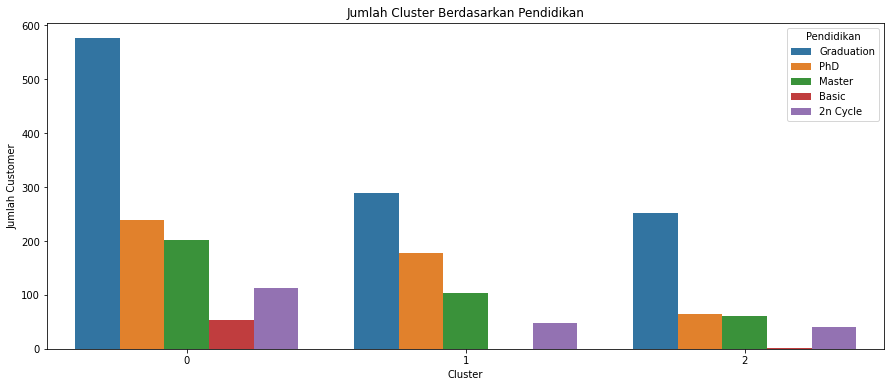

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=df_result, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Pada sebaran berdasarkan jenis pendidikan ketiga cluster didominasi oleh pendidikan yang sama yaitu "Graduation", kemudian disusul oleh PhD pada posisi kedua dan Master pada posisi ketiga.

####Persebaran penghasilan customer pada masing2 kelompok

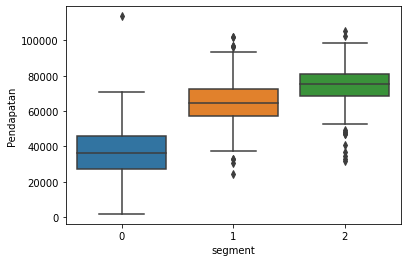

In [75]:
# Pengelompokan customer berdasarkan Pendapatan
sns.boxplot(x=df_result["segment"], y=df_result["Pendapatan"], data=df_result)

Cluster 0 merupakan rerata penghasilan customer terendah, namun memiliki pencilan data pendapatan yang tertinggi dari ketiga cluster yang ada. 
Cluster 1 merupakan rerata penghasilan tertinggi ke 2 setelah cluster 2.

####Persebaran Customer berdasarkan Status Pernikahan pada masing2 kelompok

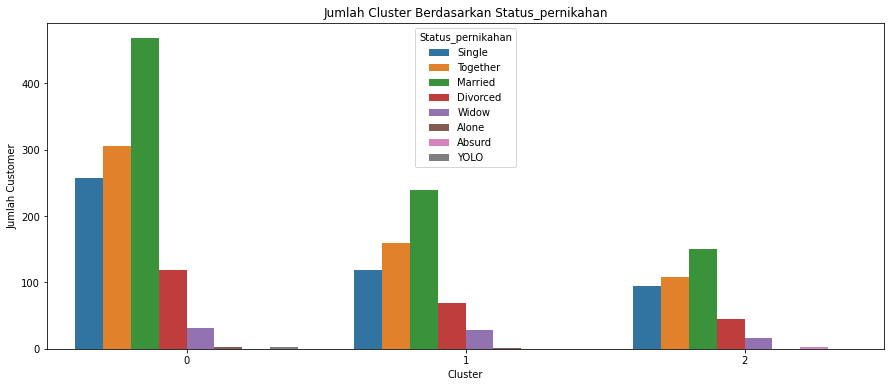

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x="segment", data=df_result, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status_pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Pada sebaran berdasarkan status pernikahan ketiga cluster didominasi oleh status pernikahan yang sama yaitu "Married", kemudian disusul oleh status "Together" pada posisi kedua dan "Single" pada posisi ketiga.

####Persebaran Customer berdasarkan Produk

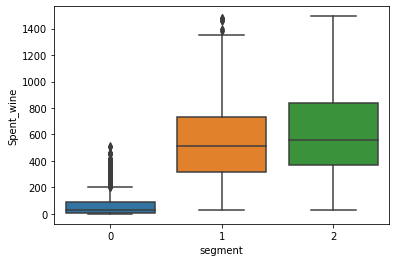

In [77]:
# Pengelompokan customer berdasarkan produk
sns.boxplot(x=df_result["segment"], y=df_result['Spent_wine'], data=df_result)

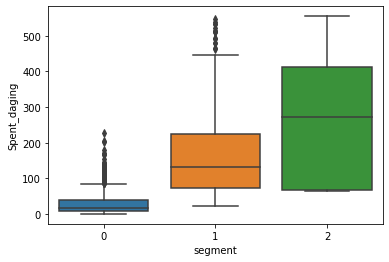

In [78]:
sns.boxplot(x=df_result["segment"], y=df_result['Spent_daging'], data=df_result)


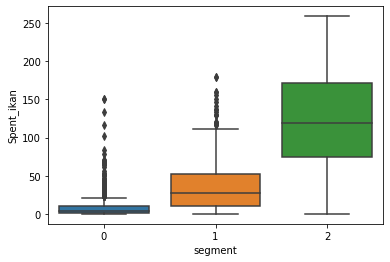

In [79]:
sns.boxplot(x=df_result["segment"], y=df_result['Spent_ikan'], data=df_result)


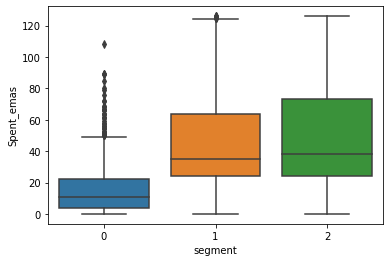

In [80]:
sns.boxplot(x=df_result["segment"], y=df_result['Spent_emas'], data=df_result)


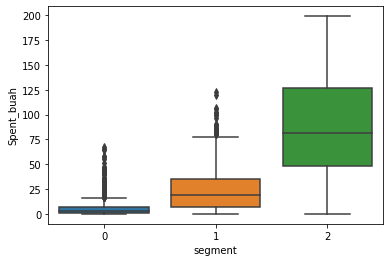

In [81]:
sns.boxplot(x=df_result["segment"], y=df_result['Spent_buah'], data=df_result)

####Persebaran Customer berdasarkan Total Produk

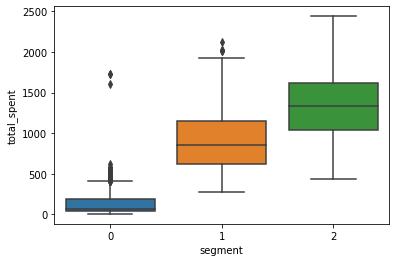

In [70]:
sns.boxplot(x=df_result["segment"], y=df_result['total_spent'], data=df_result)

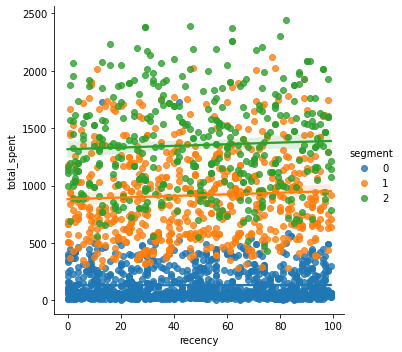

In [82]:
sns.lmplot(x='recency', y='total_spent', data=df_result, hue='segment', fit_reg=True)

In [83]:
df_result.groupby('segment').mean().sort_values('total_spent',ascending=False)

,total_anak,recency,Umur,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,total_spent
segment,,,,,,,,,,
2,0.341346,49.194712,45.776442,74834.021635,614.478365,87.439904,269.639423,124.031250,49.199519,1353.100962
1,0.792545,48.965964,47.713128,65119.874392,551.927066,24.901135,167.293355,35.774716,45.064830,916.598055
0,1.240913,48.972950,43.464074,36439.737532,67.557904,5.634827,29.416737,8.229079,15.420118,132.672866


Sebaran Customer Berdasarkan Belanja Produk

Cluster 0 memiliki kecendurungan Belanja lebih sedikit dibanding dengan lainnya. Perbedaannya-pun cukup signifikan.

Cluster 0 memiliki rerata total spent 132.67

Cluster 1 memiliki rerata total spent  916.59.

Cluster 2 memiliki rerata total spent  1353.10.

####Adakah korelasi pendapatan customer dengan jumlah produk yang dibelanjakan.

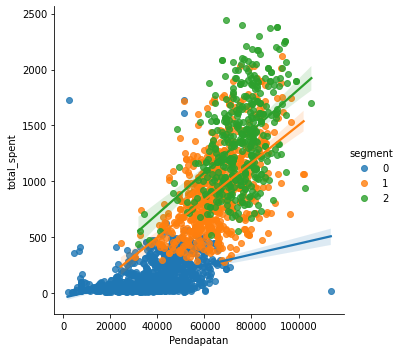

In [85]:
sns.lmplot(x='Pendapatan', y='total_spent', data=df_result, hue='segment', fit_reg=True)

In [86]:
#cek korelasi dengan metode korelasi pearson
df_result[['Pendapatan','total_spent']].corr(method='pearson')

,Pendapatan,total_spent
Pendapatan,1.000000,0.815686
total_spent,0.815686,1.000000


### KESIMPULAN/SARAN

####Kesimpulan

Dari analisa yang dilakukan maka didapat informasi bahwa 
- Kelompok pertama yaitu cluster 0 merupakan kelompok dengan Pendapatan terendah dibanding yang lainnya, selain itu cluster 0 merupakan kelompok dengan tingkat total spent terendah juga.
- Kelompok kedua yaitu cluster 1 adalah kelompok dengan Pendapatan dan tingkat total spent masuk dalam kategori sedang.
- Kelompok ketiga yaitu cluster 2 adalah kelompok yang memiliki Pendapatan terbesar, dan tingkat total spent juga tertinggi dari kelompok yang lain.
- terdapat korelasi positif yang cukup kuat antara total Pendapatan dengan pembelian produk yang ada baik secara masing-masing jenis produk, atau total spent produk secara keseluruhan. Sedangkan faktor-faktor lain seperti tingkat pendidikan, status pernikahan dan Umur tidak terlalu berpengaruh terhadap produk yang ada.


####Saran

Berdasarkan kesimpulan diatas, saran yang dapat diberikan untuk meningkatkan penjualan diantaranya adalah
- Memberikan promo tertentu untuk sehingga meningkatkan minat belanja bagi kelompok dengan rerata Pendapatan rendah.
- Membuat produk dengan leveling grade harga yang variatif sehingga meningkatkan segmen pada semua level kelompok pendapatan.  